#### Analysis 1 : Modifying Theta Amplitude 

Here I put an external oscillating current that substitutes for the theta oscillation

As the rat approaches the cue, the amplitude of the oscillations decreases.

The amplitude is described by the formula
$$
A(dis)=A_{base} + (A_{base}-A{min})e^{(-{dis}/{\lambda})}

$$

where $dis$ is the shortest distance of the animal from the cue location.

$$dis(x)=min(2\pi-|x-cue|,|x-cue|)$$

We set the current to be $$I(t)=I_{DC}+I_{O}A(dis)\sin(2\pi ft)$$

In [56]:
%cd /Users/govindrnair/TheoNeuroLab/GridCellsCond

/Users/govindrnair/TheoNeuroLab/GridCellsCond


In [57]:

import os
print(os.getcwd())

/Users/govindrnair/TheoNeuroLab/GridCellsCond


In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sim_utils as s_utils
import analysis_utils as a_utils
from network_configs.instrumentations.trajectory1D import Trajectory1D
from scipy import stats
import h5py

In [59]:
def circular_error(var1,var2):

    """Calculate the circular error between two angles.

    Parameters:
        var1 (float or array-like): The first angle in radians.
        var2 (float or array-like): The second angle in radians.
    Returns:
        numpy.ndarray: The minimum absolute difference between the angles
    """
    circum = 2*np.pi
    return np.abs(np.min(np.vstack((np.abs(var1-var2),circum-np.abs(var1-var2))),axis=0))

#### Control Simulation

In [88]:
c_sim_id = "THETA_MOD_1_control"
c_sim_num = 0
sim_dur = float(30000)
c_params = s_utils.load_sim_params(c_sim_id)["0"]
c_traj = Trajectory1D(c_params,save_mem=False)
n_trials=1
c_decoded_postions = np.zeros((n_trials,int(c_params["sim_dur"]-c_traj.init_allothetic_dur)))
sim_num=0

c_file_path_stell = "data/THETA_MOD_1_control/stell_spks_THETA_MOD_1_control.hdf5"

with h5py.File(c_file_path_stell, "r") as f:
    print("Top-level groups:", list(f.keys()))
    for grp in f.keys():
        print(grp, "contains:", list(f[grp].keys()))

for tr in range(n_trials):
    print("Trial Number ",tr)
    stell_spks,_ = s_utils.load_spikes(c_sim_id,sim_num)
    c_decoded_postions[tr,:] = a_utils.decode_pos(stell_spks,c_params,win_size=40,t_start=int(c_traj.init_allothetic_dur))
    sim_num+=1
c_decoded_position = stats.circmean(c_decoded_postions,axis=0)

c_std = stats.circstd(c_decoded_postions,axis=0)
t_ms = np.arange(c_traj.init_allothetic_dur,c_params["sim_dur"])
t_ms_idx = (t_ms/0.025).astype('int')
position_input = c_traj.pos_input[t_ms_idx]
velocity_input = c_traj.vel_input[t_ms_idx]
t_s= np.linspace(c_traj.init_allothetic_dur/1000,(c_params['sim_dur']/1000),len(c_decoded_postions[0]))


[2.49986607e-11 4.99964287e-11 7.49933038e-11 ... 1.44299205e+00
 1.44324205e+00 1.44349205e+00]
Top-level groups: ['0']
0 contains: ['stell_spks']
Trial Number  0
Hallelujah
Stellate File Path :  data/THETA_MOD_1_control/stell_spks_THETA_MOD_1_control.hdf5
Interneuron File Path :  data/THETA_MOD_1_control/intrnrn_spks_THETA_MOD_1_control.hdf5


#### Modified Simulation

In [70]:
m_sim_id = "THETA_MOD_1_mod"
m_sim_num = 0
sim_dur = float(30000)
m_params = s_utils.load_sim_params(m_sim_id)["0"]
m_traj = Trajectory1D(m_params,save_mem=False)
n_trials=1
m_decoded_postions = np.zeros((n_trials,int(m_params["sim_dur"]-m_traj.init_allothetic_dur)))
sim_num=0

m_file_path_stell = "data/THETA_MOD_1_mod/stell_spks_THETA_MOD_1_mod.hdf5"

with h5py.File(m_file_path_stell, "r") as f:
    print("Top-level groups:", list(f.keys()))
    for grp in f.keys():
        print(grp, "contains:", list(f[grp].keys()))

for tr in range(n_trials):
    print("Trial Number ",tr)
    stell_spks,_ = s_utils.load_spikes(m_sim_id,sim_num)
    m_decoded_postions[tr,:] = a_utils.decode_pos(stell_spks,m_params,win_size=40,t_start=int(m_traj.init_allothetic_dur))
    sim_num+=1
m_decoded_position = stats.circmean(m_decoded_postions,axis=0)

m_std = stats.circstd(m_decoded_postions,axis=0)
t_ms = np.arange(m_traj.init_allothetic_dur,m_params["sim_dur"])
t_ms_idx = (t_ms/0.025).astype('int')
position_input = m_traj.pos_input[t_ms_idx]
velocity_input = m_traj.vel_input[t_ms_idx]
t_s= np.linspace(c_traj.init_allothetic_dur/1000,(c_params['sim_dur']/1000),len(c_decoded_postions[0]))


[2.49986607e-11 4.99964287e-11 7.49933038e-11 ... 1.44299205e+00
 1.44324205e+00 1.44349205e+00]
Top-level groups: ['0']
0 contains: ['stell_spks']
Trial Number  0
Hallelujah
Stellate File Path :  data/THETA_MOD_1_mod/stell_spks_THETA_MOD_1_mod.hdf5
Interneuron File Path :  data/THETA_MOD_1_mod/intrnrn_spks_THETA_MOD_1_mod.hdf5


##### Plotting the trajectories

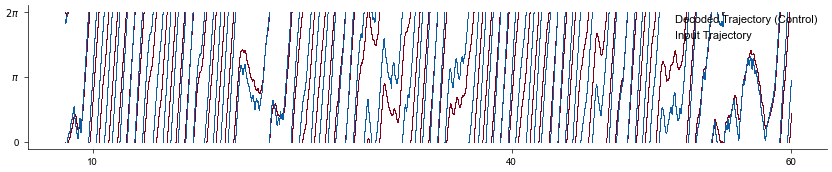

In [90]:
from matplotlib.lines import Line2D
t_s= np.linspace(c_traj.init_allothetic_dur/1000,(c_params['sim_dur']/1000),len(c_decoded_postions[0]))
fig,ax=plt.subplots(1,1,figsize=(10+0.313,1.87))
ax.errorbar(x=t_s,y=c_decoded_position,yerr=c_std,ecolor=(119/255, 163/255, 201/255,0.25),fmt="none")
ax.errorbar(x=t_s,y=m_decoded_position,yerr=m_std,ecolor=(200/255, 100/255, 69/255,0.25),fmt="none")
lc=ax.scatter(t_s,c_decoded_position,label=f'Decoded Trajectory (Control)',zorder=2,s=0.5,linewidth=0)
#lm=ax.scatter(t_s,m_decoded_position,label=f'Decoded Trajectory (Modified)',zorder=2,s=0.5,linewidth=0)
ax.scatter(t_s,position_input,label='Input Trajectory',s=0.5,linewidth=0,c="#820018")
ax.set_yticks(np.arange(0,2*np.pi+np.pi/2,np.pi/2))
ax.set_yticklabels(["0","$\\pi /2$","$\\pi$","$3\\pi /2$","$2 \\pi$"])
plt.style.use("analysis/config/paper.mplstyle")
plt.draw()
yticks = ax.get_yticks()
ax.set_yticks([yticks[0],yticks[2], yticks[-1]])
xticks = ax.get_xticks()
ax.set_xticks([xticks[1],xticks[int(len(xticks)/2)], xticks[-2]])
legend_elements = [Line2D([0], [0], color='#0C5DA5', lw=1, label='Decoded Trajectory'),
                   Line2D([0], [0], color='#00B945', lw=1, label='Input Trajectory')]
leg=ax.legend(handles=legend_elements, loc='best',handlelength=1,fontsize=7)
plt.legend()
plt.show()


Error 

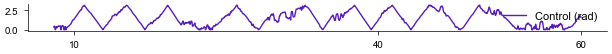

In [92]:
plt.style.use("analysis/config/paper.mplstyle")
fig,ax=plt.subplots(1,1,figsize=(7.48,0.35))
c_errs=np.abs(circular_error(c_decoded_position[1:],position_input[:-1]))
#m_errs = np.abs(circular_error(m_decoded_position[1:],position_input[:-1]))

ax.plot(t_s[1:],c_errs,c="#581DBD",label="Control (rad)",linewidth=1)
#ax.plot(t_s[1:],m_errs,c="#BD1F1F",label="Mod (rad)",linewidth=1)
plt.legend()
plt.draw()
xticks = ax.get_xticks()
ax.set_xticks([xticks[1],xticks[int(len(xticks)/2)], xticks[-2]])

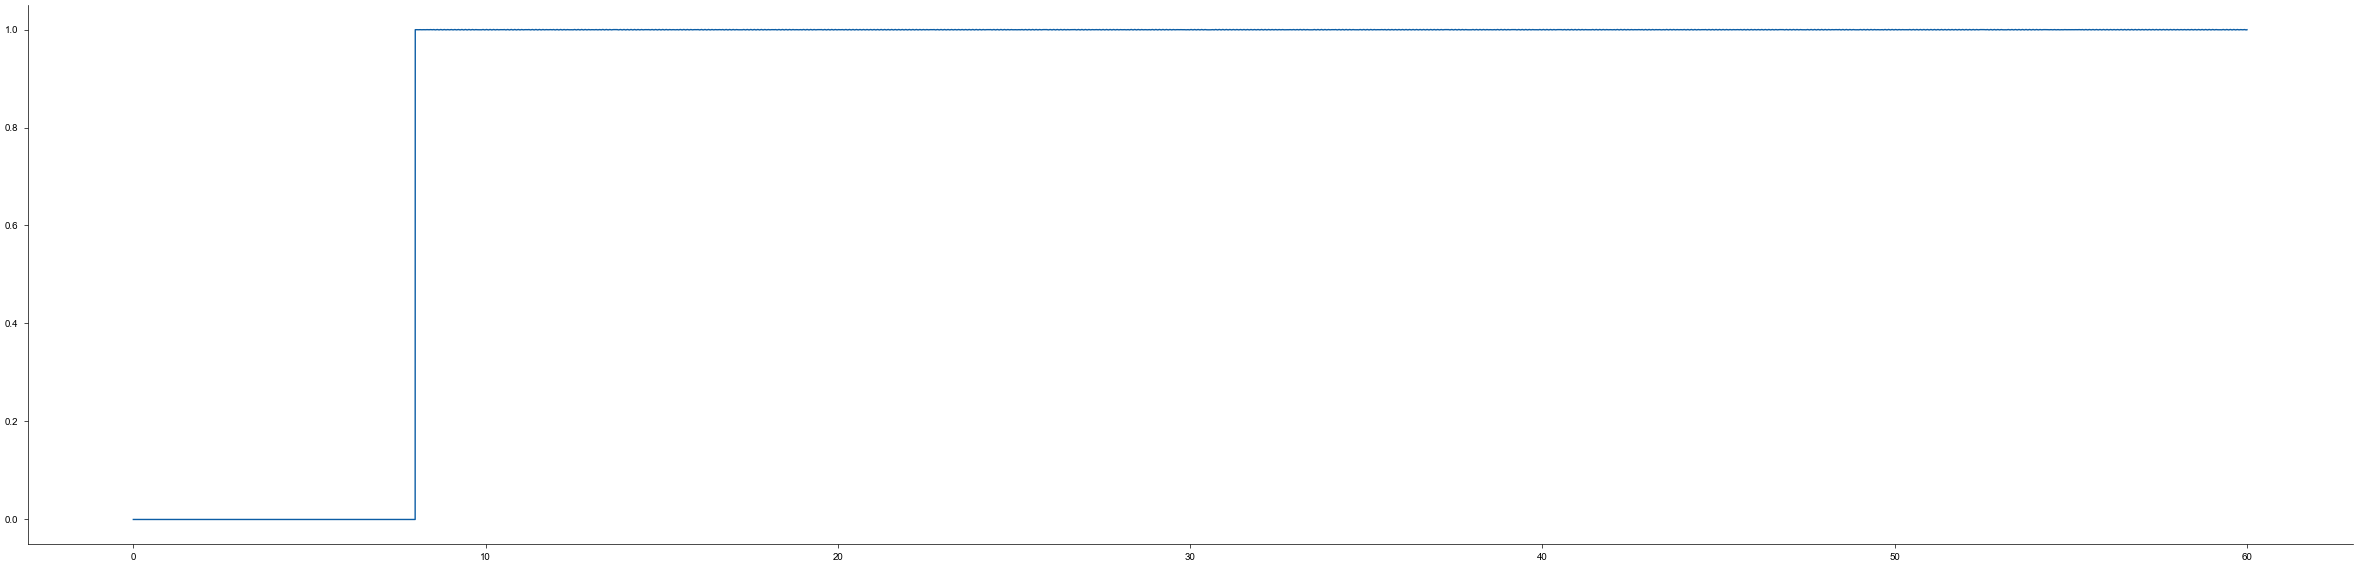

In [73]:
dc_input = m_traj.intrnrn_dc
time_arr = np.linspace(0,60,2400001)
fig,ax = plt.subplots(1,1,figsize=(30,7))
ax.plot(time_arr,dc_input)
plt.show()

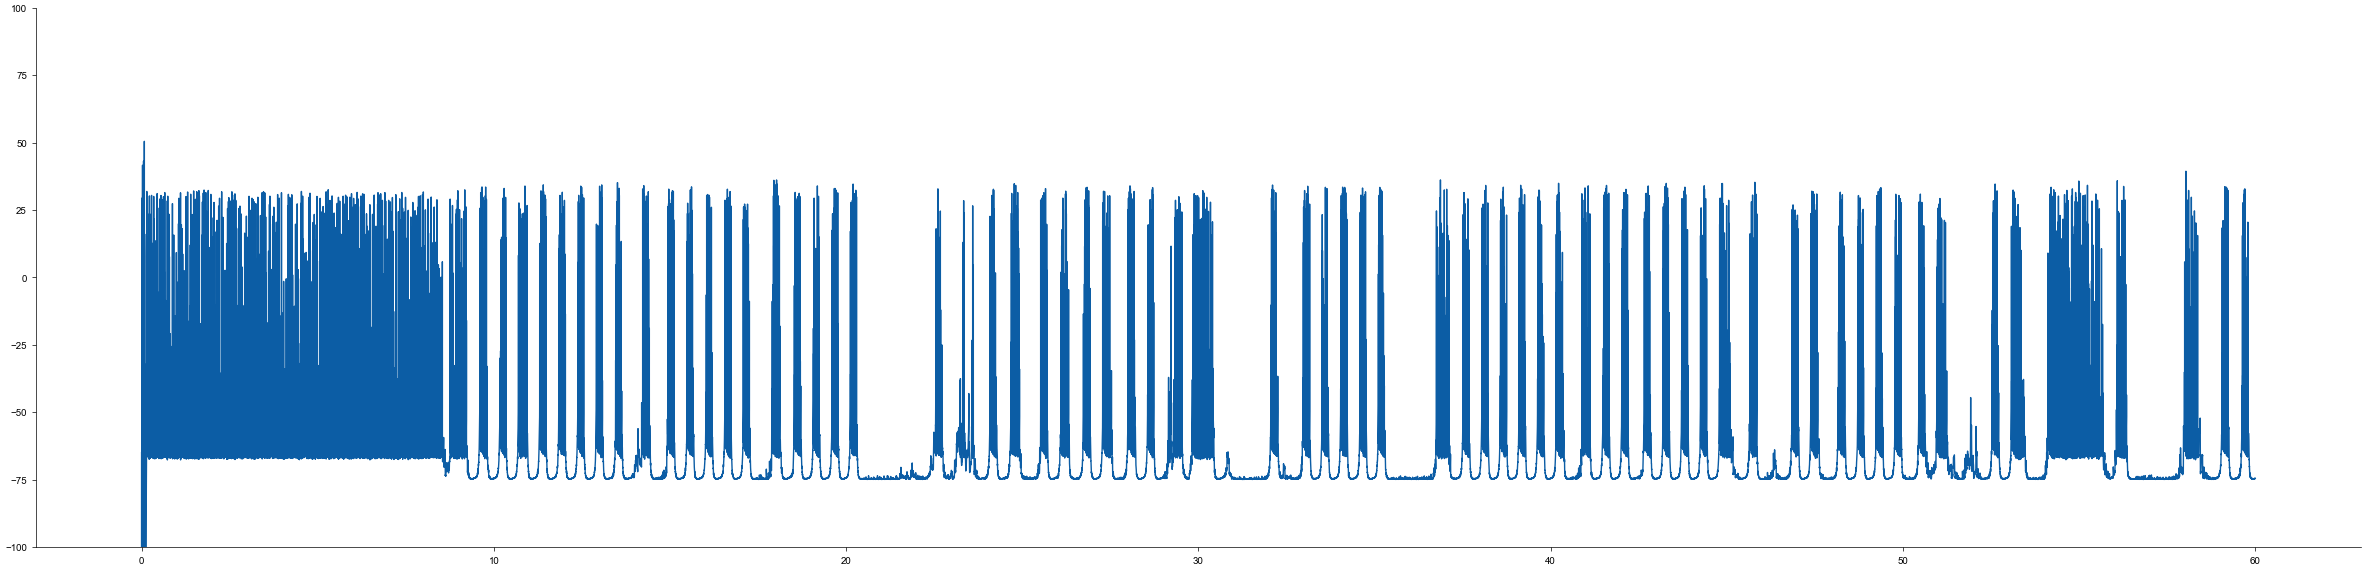

In [93]:
intrnrn_v = s_utils.load_data(sim_id=c_sim_id,data_id="intrnrn_v")
time_arr = np.linspace(0,60,60000)
fig,ax = plt.subplots(1,1,figsize=(30,7))
ax.plot(time_arr,intrnrn_v)
ax.set_ylim(-100, 100)
plt.show()